In [2]:
import numpy as np
import pandas as pd


In [3]:
# read data
# parameter header is used to index head line
#pd.read_csv('',header=0)
data = pd.read_csv(r'Iris.csv') # 文件名称前加r字符串转译
data
# data.head(15) # head line default is five lines
# data.tail(5) # last five lines
# data.sample() # ramdomly select n samples

,Id,sepalLengthCm,sepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [79]:
# map object into other type of variables
# .map({}=a,{}=b) # create dictionary to map transfer value
data["Species"] = data["Species"].map({"Iris-versicolor": 0, "Iris-setosa": 1, "Iris-virginica": 2})
data["Species"]

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [62]:
# delete redundant data
# delete column direction index is 1
data_del = data.drop('Id',axis=1)
#data.drop('Id',axis=1,inplace=True) # 彻底修改原有数据值,inplace=True
print (data_del)
data

     sepalLengthCm  sepalWidthCm  PetalLengthCm  PetalWidthCm         Species
0              5.1           3.5            1.4           0.2     Iris-setosa
1              4.9           3.0            1.4           0.2     Iris-setosa
2              4.7           3.2            1.3           0.2     Iris-setosa
3              4.6           3.1            1.5           0.2     Iris-setosa
4              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
145            6.7           3.0            5.2           2.3  Iris-virginica
146            6.3           2.5            5.0           1.9  Iris-virginica
147            6.5           3.0            5.2           2.0  Iris-virginica
148            6.2           3.4            5.4           2.3  Iris-virginica
149            5.9           3.0            5.1           1.8  Iris-virginica

[150 rows x 5 columns]


,Id,sepalLengthCm,sepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [77]:
# check data duplicated
data_del.duplicated().any()
# delete duplicated data
deldup = data_del.drop_duplicates()
len(data)
len(deldup)

147

In [80]:
# count the number of specific class
data["Species"].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [16]:
# KNN
class KNN:
    """使用python语言实现k近邻算法"""
    def __init__(self,k):
        """初始化方法
        parameters
        ----
        k:int
          邻居个数
        """
        self.k = k
    
    def fit(self,X,y):
        """训练方法
        parameters
        ----
        X:类数组类型，形状为：[样本数量，特征数量]
          待训练样本特征
        y:；类数组类型，形状为：[样本数量]
          每个样本的目标值（标签）"""
        # 将X转换为nparray数组类型
        self.X = np.asarray(X)
        self.y = np.asarray(y)
    
    def predict(self,X):
        """根据参数传递的样本，对样本数据进行预测
        parameters
        ----
        X:类数组类型，形状为：[样本数量，特征数量]
          待训练样本特征
         result:数组类型
             预测的结果
        """

        X = np.asarray(X)
        result = []
        # 对np.array数组进行遍历，每次取数组中的一行
        for x in X:
            # 对于测试集中的每一个样本，依次与训练集中的所有样本求距离
            dis = np.sqrt(np.sum((x - self.X)**2,axis=1)) #axis=1 行方向相加
            # 返回数组排序后，每个元素在原数组中的索引。
            index = dis.argsort()
            # 进行截断，只取前k个元素
            index = index[:self.k]
            # 返回数组中每个元素出现的次数
            count = np.bincount(self.y[index]) # 应用index索引出对应的y值，会返回每个类别的数量
            # 返回ndarray数组中值最大元素对应的索引。该索引就是我们判定的类别
            # 最大元素索引，就是出现最多的元素
            result.append(count.argmax())
        return np.asarray(result)

    def predict2(self,X):
        """根据参数传递的样本，对样本数据进行预测（考虑权重，使用距离倒数作为权重）
        parameters
        ----
        X:类数组类型，形状为：[样本数量，特征数量]
          待训练样本特征
         result:数组类型
             预测的结果
        """

        #带有权重的KNN
        # 每段距离权重不同

        X = np.asarray(X)
        result = []
        # 对np.array数组进行遍历，每次取数组中的一行
        for x in X:
            # 对于测试集中的每一个样本，依次与训练集中的所有样本求距离
            dis = np.sqrt(np.sum((x - self.X)**2,axis=1)) #axis=1 行方向相加
            # 返回数组排序后，每个元素在原数组中的索引。
            index = dis.argsort()
            # 进行截断，只取前k个元素
            index = index[:self.k]
            # 返回数组中每个元素出现的次数 # bincount()数次数 # 设定距离权重
            count = np.bincount(self.y[index], weights=1 / dis[index]) # 应用index索引出对应的y值，会返回每个类别的数量
            # 返回ndarray数组中值最大元素对应的索引。该索引就是我们判定的类别
            # 最大元素索引，就是出现最多的元素
            result.append(count.argmax())
        return np.asarray(result)

In [17]:
# 提取出每个鸢尾花数据
t0 = data[data["Species"] == 0]
t1 = data[data["Species"] == 1]
t2 = data[data["Species"] == 2]

# 对每个类别数据进行洗牌
t0 = t0.sample(len(t0), random_state=0)# 从t0中随机取t0样本数量一样的样本，相当于打乱样本顺序。
#random_state代表一直以0方式进行随机打乱。（固定模式）
t1 = t1.sample(len(t1), random_state=0)
t2 = t2.sample(len(t2), random_state=0)

# 构建训练集与测试集
train_X = pd.concat([t0.iloc[:40,:-1],t1.iloc[:40,:-1],t2.iloc[:40,:-1]],axis=0)# pd.concat()进行数据拼接 # 选择0-40行作为训练集 # -1代表倒数第一列
train_y = pd.concat([t0.iloc[:40,-1],t1.iloc[:40,-1],t2.iloc[:40,-1]],axis=0)

test_X = pd.concat([t0.iloc[40:,:-1],t1.iloc[40:,:-1],t2.iloc[40:,:-1]],axis=0)
test_y = pd.concat([t0.iloc[40:,-1],t1.iloc[40:,-1],t2.iloc[40:,-1]],axis=0)

# 创建KNN对象
knn = KNN(k=3)

# 进行训练
knn.fit(train_X,train_y)

#进行测试，获得测试结果
result = knn.predict(test_X)
display(np.sum(result == test_y))
len(result)


0

0

In [18]:
#考虑权重，进行测试predict2()
result2 = knn.predict(test_X)
display(np.sum(result2 == test_y))
len(result)

0

0

In [114]:
# 可视化
import matplotlib as mpl
import matplotlib.pyplot as plt=

In [116]:
# 中文显示设置
# mpl.rcParams[]
mpl.rcParams["font.family"] = "SimHei" # 将中文设置为黑体
mpl.rcParams["axes.unicode_minus"] = False # 其中负号minus不变

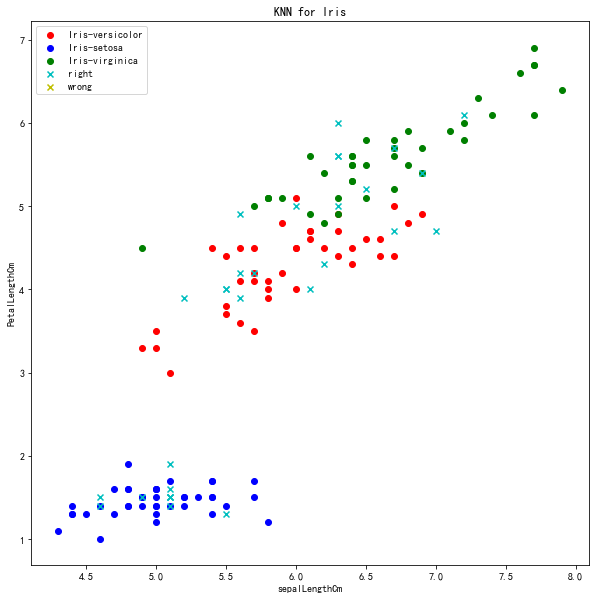

In [128]:
# 设置画布大小
plt.figure(figsize=(10,10))
# {"Iris-versicolor": 0, "Iris-setosa": 1, "Iris-virginica": 2}
# 绘制训练集数据 # 二维
plt.scatter(x=t0["sepalLengthCm"][:40],y=t0["PetalLengthCm"][:40],color="r",label="Iris-versicolor")
plt.scatter(x=t1["sepalLengthCm"][:40],y=t1["PetalLengthCm"][:40],color="b",label="Iris-setosa")
plt.scatter(x=t2["sepalLengthCm"][:40],y=t2["PetalLengthCm"][:40],color="g",label="Iris-virginica")

# 测试集数据
right = test_X[result == test_y]
wrong = test_X[result != test_y]
plt.scatter(x=right["sepalLengthCm"],y=right["PetalLengthCm"],color="c", marker="x",label="right")
plt.scatter(x=wrong["sepalLengthCm"],y=wrong["PetalLengthCm"],color="y", marker="x",label="wrong")
plt.xlabel("sepalLengthCm")
plt.ylabel("PetalLengthCm")
plt.title("KNN for Iris")
plt.legend(loc="best")
plt.show()